In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [2]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing

In [3]:
d = os.path.join("/content/gdrive/MyDrive/Dataset/Training_Data(Resized)")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [4]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 659
Images of label "Metal":	 592
Images of label "Paper":	 597
Images of label "Plastic":	 666
Images of label "Trash":	 256


In [5]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [6]:
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-6-eb3a6eb15208>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [7]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [8]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2770, 224, 224, 3) (2770,)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4, stratify=y)

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1939, 224, 224, 3) (1939,)
(831, 224, 224, 3) (831,)


## Build Model

In [11]:
model_vgg19=tf.keras.applications.vgg19.VGG19(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

574710816/574710816 [==============================] - 17s 0us/step


In [12]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
base_input4=model_vgg19.layers[0].input
base_output4=model_vgg19.layers[-2].output

final_output4 = layers.Dense(240)(base_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(128)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(64)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(5, activation='softmax')(final_output4)

In [14]:
new_model_vgg19 = tf.keras.Model(inputs = base_input4, outputs = final_output4)

In [15]:
new_model_vgg19.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [16]:
result_V=new_model_vgg19.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
61/61 [==============================] - 73s 813ms/step - loss: 1.2728 - accuracy: 0.5240 - val_loss: 1.2088 - val_accuracy: 0.4645
Epoch 2/20
61/61 [==============================] - 37s 605ms/step - loss: 1.0533 - accuracy: 0.5750 - val_loss: 0.8043 - val_accuracy: 0.6486
Epoch 3/20
61/61 [==============================] - 35s 577ms/step - loss: 0.8515 - accuracy: 0.6668 - val_loss: 0.8987 - val_accuracy: 0.7100
Epoch 4/20
61/61 [==============================] - 37s 601ms/step - loss: 0.6261 - accuracy: 0.7839 - val_loss: 0.5588 - val_accuracy: 0.7882
Epoch 5/20
61/61 [==============================] - 37s 602ms/step - loss: 0.2885 - accuracy: 0.8958 - val_loss: 0.3068 - val_accuracy: 0.8953
Epoch 6/20
61/61 [==============================] - 37s 601ms/step - loss: 0.1553 - accuracy: 0.9520 - val_loss: 0.1717 - val_accuracy: 0.9410
Epoch 7/20
61/61 [==============================] - 36s 599ms/step - loss: 0.6211 - accuracy: 0.8272 - val_loss: 1.1864 - val_accuracy: 0.5740

## Accuracy

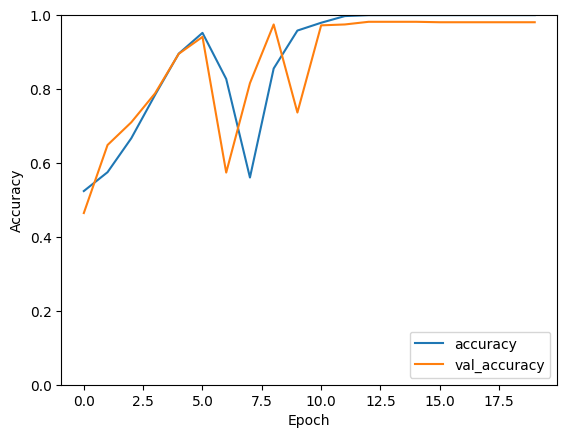

In [17]:
plt.plot(result_V.history['accuracy'], label='accuracy')
plt.plot(result_V.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

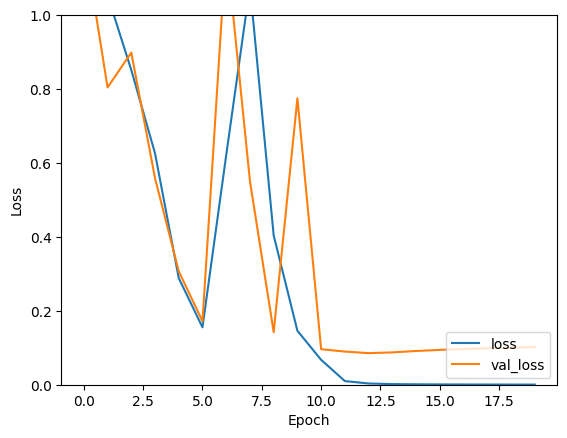

In [18]:
plt.plot(result_V.history['loss'], label='loss')
plt.plot(result_V.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [19]:
loss , accuracy = new_model_vgg19.evaluate(x_test,y_test)

26/26 [==============================] - 4s 151ms/step - loss: 0.1019 - accuracy: 0.9807


In [20]:
y_pred = new_model_vgg19.predict(x_test).round(2)

26/26 [==============================] - 4s 145ms/step


[[474   2   1   0   0]
 [  2 187   2   0   0]
 [  0   2 109   1   0]
 [  3   0   0  45   0]
 [  0   1   2   0   0]]


<Axes: >

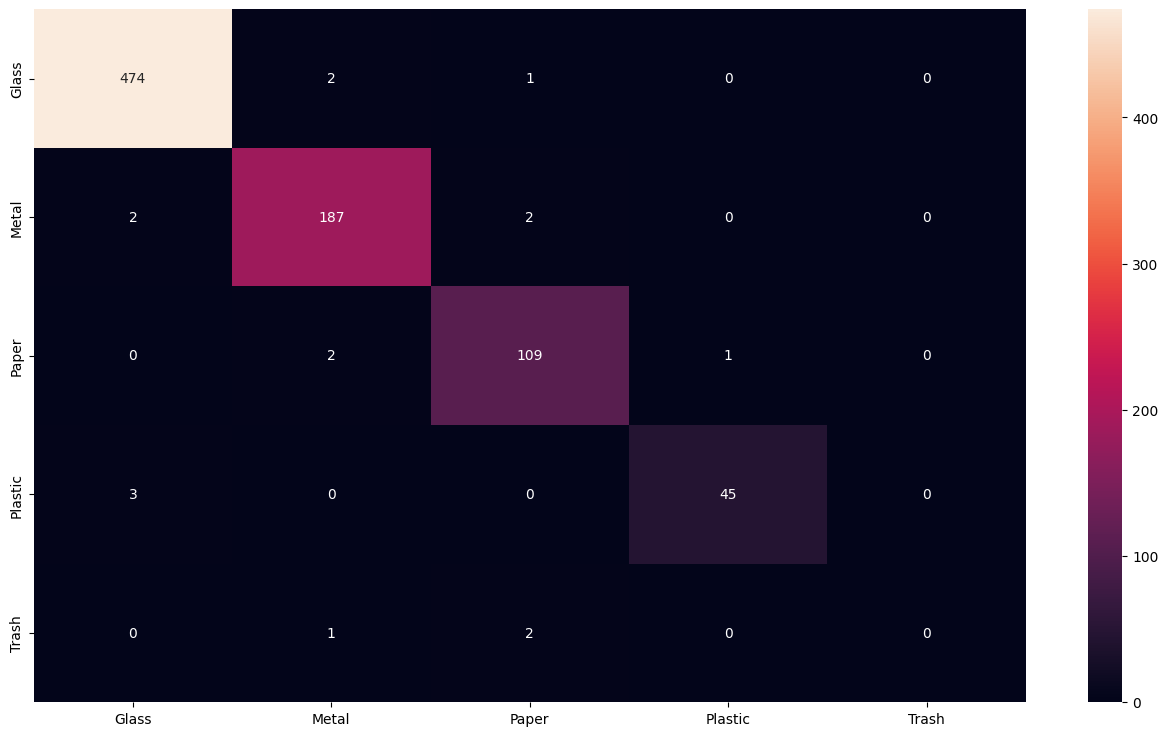

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [22]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.99      0.99      0.99       477
       Metal       0.97      0.98      0.98       191
       Paper       0.96      0.97      0.96       112
     Plastic       0.98      0.94      0.96        48
       Trash       0.00      0.00      0.00         3

    accuracy                           0.98       831
   macro avg       0.78      0.78      0.78       831
weighted avg       0.98      0.98      0.98       831



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save The Model

In [ ]:
# serialize model to JSON
model_json = new_model_vgg19.to_json()
with open("VGG_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_vgg19.save_weights("VGG_model.h5")

## Saving Model In Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive"

 A			 'Final Year Project'	      Mysql
'Academic Research'	 'First Project(100 Ideas)'   Pendrive
'All software'		 'Higher Study'		      Personal
 Andriod_development	 'ICT-9th batch'	      Programming
'Android Development'	  IDM			     'Programming Tutorials'
 Anik			  Job			      Projects
'Certificates & papers'  'Machine Learning'	      Robotics
 Classroom		  Marrige		     'Robotics Project'
'Colab Notebooks'	 'ML Data'		      Robot_Software
'Deep Learning'		 'M. Learning'		      server
 Diary			  Movies		     'Social Life'
 English		  Mridul		     'web development'
 Extra			 'My IELTS'


In [23]:
model_json = new_model_vgg19.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/VGG_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_vgg19.save_weights("/content/gdrive/My Drive/Colab Notebooks/VGG_modell.h5")

In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks"

Class.ipynb	       DenseNet1_model.json		 test.ipynb
DenseNet1_Colab.ipynb  garbage-classification-cnn.ipynb  Untitled0.ipynb
DenseNet1_model.h5     rese.ipynb
